# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

df = pd.read_csv('students.csv')
df.head()

,CPF,Nome,Sexo,Idade,Endereço,Nota do ENEM,Abandono,Semestre de desistência,CRA até 2º semestre,CRA até 4º semestre,CRA até 6º semestre
0,114.705.355-86,Isaac Rodrigues,M,20,Rua Ramos Conjunto Jatoba 53298-333 Campos / RJ,679,False,NaN,9.72,9.74,9.71
1,588.388.942-19,Srta. Isis Gomes,F,18,"Conjunto Eduardo Rodrigues, 7 Jaraguá 20720659...",763,False,NaN,5.34,9.96,9.78
2,337.376.161-37,Carlos Eduardo Caldeira,M,20,"Viaduto Viana, 7 Universitário 06189-366 da Pa...",724,False,NaN,9.11,5.43,6.97
3,341.556.934-37,Guilherme Moreira,F,26,"Pátio Novaes, 6 Miramar 96967-239 Souza / AM",689,False,NaN,6.26,9.99,5.82
4,855.557.915-38,Julia da Mata,F,21,"Quadra Correia, 90 Silveira 99225-276 Cardoso ...",666,False,NaN,6.23,5.91,5.23


1. Identifique qual q relação de alunos de sexo masculino e feminino no conjunto.

In [7]:
porcent_masc = df[df['Sexo'] == 'M'].shape[0] / df.shape[0] * 100
porcent_fem = df[df['Sexo'] == 'F'].shape[0] / df.shape[0] * 100

print(f'Porcentagem de alunos do sexo masculino: {porcent_masc:.2f}%')
print(f'Porcentagem de alunos do sexo feminino: {porcent_fem:.2f}%')

Porcentagem de alunos do sexo masculino: 48.90%
Porcentagem de alunos do sexo feminino: 51.10%


2. Dado que os alunos tem idade entre 18 e 28 anos, mostre qual a média da nota do ENEM dos alunos agrupados por idade.

In [8]:
media_enem = df['Nota do ENEM'].groupby(df['Idade']).mean()

print(f'Média das notas do ENEM por idade:\n{media_enem}')

Média das notas do ENEM por idade:
Idade
18    716.614583
19    719.804124
20    721.346535
21    722.166667
22    729.222222
23    721.522936
24    713.836207
25    713.185185
26    724.459184
27    715.863158
Name: Nota do ENEM, dtype: float64


3. Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10.

In [9]:
min = df['Nota do ENEM'].min()
max = df['Nota do ENEM'].max()
df['Nota do ENEM'] = 5 + (df['Nota do ENEM'] - min) / (max - min) * 5
df.head()

,CPF,Nome,Sexo,Idade,Endereço,Nota do ENEM,Abandono,Semestre de desistência,CRA até 2º semestre,CRA até 4º semestre,CRA até 6º semestre
0,114.705.355-86,Isaac Rodrigues,M,20,Rua Ramos Conjunto Jatoba 53298-333 Campos / RJ,6.21875,False,NaN,9.72,9.74,9.71
1,588.388.942-19,Srta. Isis Gomes,F,18,"Conjunto Eduardo Rodrigues, 7 Jaraguá 20720659...",8.84375,False,NaN,5.34,9.96,9.78
2,337.376.161-37,Carlos Eduardo Caldeira,M,20,"Viaduto Viana, 7 Universitário 06189-366 da Pa...",7.62500,False,NaN,9.11,5.43,6.97
3,341.556.934-37,Guilherme Moreira,F,26,"Pátio Novaes, 6 Miramar 96967-239 Souza / AM",6.53125,False,NaN,6.26,9.99,5.82
4,855.557.915-38,Julia da Mata,F,21,"Quadra Correia, 90 Silveira 99225-276 Cardoso ...",5.81250,False,NaN,6.23,5.91,5.23


4. Faça um gráfico de evolução das notas, desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino.

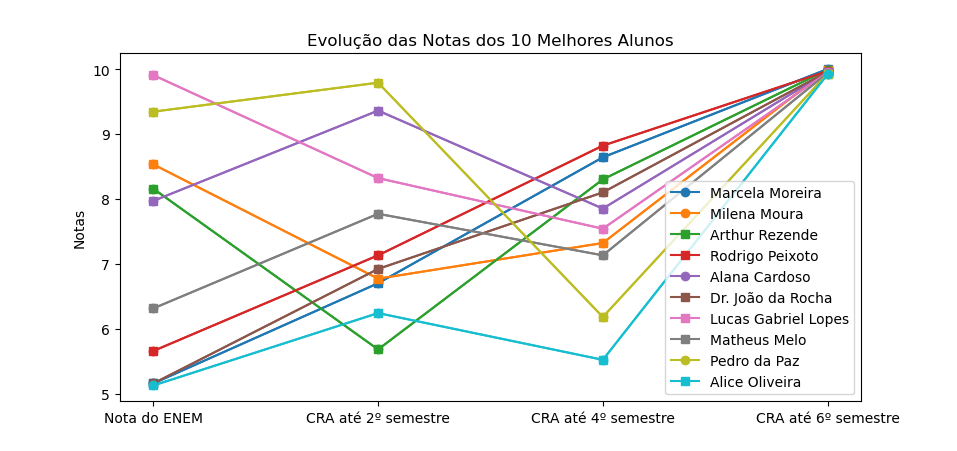

In [10]:
melhores_alunos = df.nlargest(10, 'CRA até 6º semestre')

markers = ['o' if x == 'F' else 's' for x in melhores_alunos['Sexo']]
# plt.plot(['Nota do ENEM', 'CRA até 2º semestre', 'CRA até 4º semestre', 'CRA até 6º semestre'], [melhores_alunos['Nota do ENEM'], melhores_alunos['CRA até 2º semestre'], melhores_alunos['CRA até 4º semestre'], melhores_alunos['CRA até 6º semestre']])

for i in range(melhores_alunos.shape[0]):
    plt.plot(['Nota do ENEM', 'CRA até 2º semestre', 'CRA até 4º semestre', 'CRA até 6º semestre'], [melhores_alunos['Nota do ENEM'].iloc[i], melhores_alunos['CRA até 2º semestre'].iloc[i], melhores_alunos['CRA até 4º semestre'].iloc[i], melhores_alunos['CRA até 6º semestre'].iloc[i]], marker=markers[i])

plt.ylabel('Notas')
plt.legend(melhores_alunos['Nome'], loc='best')
plt.title('Evolução das Notas dos 10 Melhores Alunos')
plt.show()